# 数据集



## 数据集下载

关于本项目的数据集保存在[Kaggle](https://www.kaggle.com/)的[huizecai/mushroom](https://www.kaggle.com/datasets/huizecai/mushroom)中，下面的单元格可以直接下载该数据集并返回其路径。

In [1]:
import os
import kagglehub

# 使用KaggleHub下载数据集
dataset_name = "huizecai/mushroom"
path = kagglehub.dataset_download(dataset_name)

print("Path to dataset files:", path)

100%|██████████| 436M/436M [00:04<00:00, 104MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/huizecai/mushroom/versions/5


## 计算各蘑菇种类的图片数量

由于tensorflow中会有中文路径异常问题，该数据集中的各种类的文件夹名以“classXX”来命名，并用label.txt来与其中文名进行映射。

In [2]:
dataset_path = path + '/archive/data'
label_path = path + '/archive/label.txt'

# 获取所有子目录（即蘑菇类别）
dir_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# 读取 label.txt 并解析内容
categories = {}
with open(label_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            category_name = parts[0]
            category_id = parts[1]
            categories[category_id] = category_name

# 统计每种类别的图像数量
category_counts = {}
for category_id in categories.keys():
    if category_id in dir_names:  # 确保目录存在
        category_dir = os.path.join(dataset_path, category_id)
        num_images = len([f for f in os.listdir(category_dir) if f.endswith('.jpg') or f.endswith('.jpeg')])
        category_counts[categories[category_id]] = num_images

print("Category counts:", category_counts)

Category counts: {'羊肚菌': 170, '牛肝菌': 155, '鸡油菌': 153, '鸡枞菌': 165, '青头菌': 174, '奶浆菌': 182, '干巴菌': 156, '虎掌菌': 177, '白葱牛肝菌': 181, '老人头菌': 137, '猪肚菌': 109, '谷熟菌': 160, '白参菌': 171, '黑木耳': 174, '银耳': 127, '金耳': 157, '猴头菇': 176, '香菇': 168, '平菇': 161, '金针菇': 115, '口蘑': 139, '鹿茸菇': 154, '榆黄蘑': 177, '榛蘑': 172, '草菇': 149, '鸡腿菇': 137, '茶树菇': 159, '蟹味菇': 105, '白玉菇': 136, '红菇': 177, '杏鲍菇': 160, '松茸': 181, '姬松茸': 178, '松露': 151, '竹荪': 178, '虫草花': 177}


## 处理中文字体异常问题

在部分运行环境中，matplotlib可能会出现中文显示异常问题。此处将加载“SimHei”字体以解决该问题。

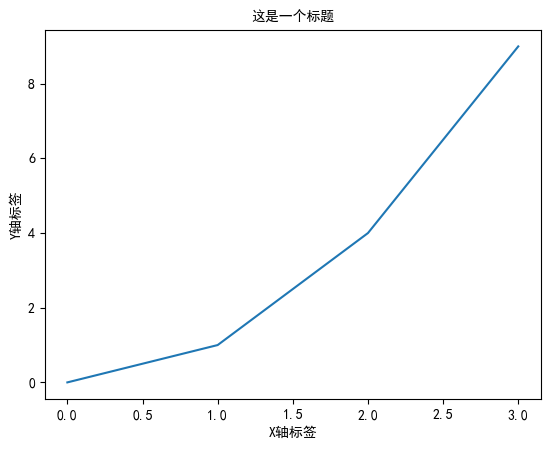

In [3]:
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, fontManager

# 下载并保存字体文件
font_url = "https://github.com/caijihuize/Mushroom_Classification/raw/main/SimHei.ttf"
font_name = "SimHei.ttf"
if not os.path.exists(font_name):
    urllib.request.urlretrieve(font_url, font_name)

# 注册字体文件到matplotlib的字体管理器
fontManager.addfont(font_name)

# 设置字体属性
font_prop = FontProperties(fname=font_name)

# 确保matplotlib使用正确的字体族名称
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 示例绘图
plt.title('这是一个标题', fontproperties=font_prop)
plt.xlabel('X轴标签', fontproperties=font_prop)
plt.ylabel('Y轴标签', fontproperties=font_prop)
plt.plot([0, 1, 2, 3], [0, 1, 4, 9])
plt.show()

## 绘制各种类图片数量的柱状图

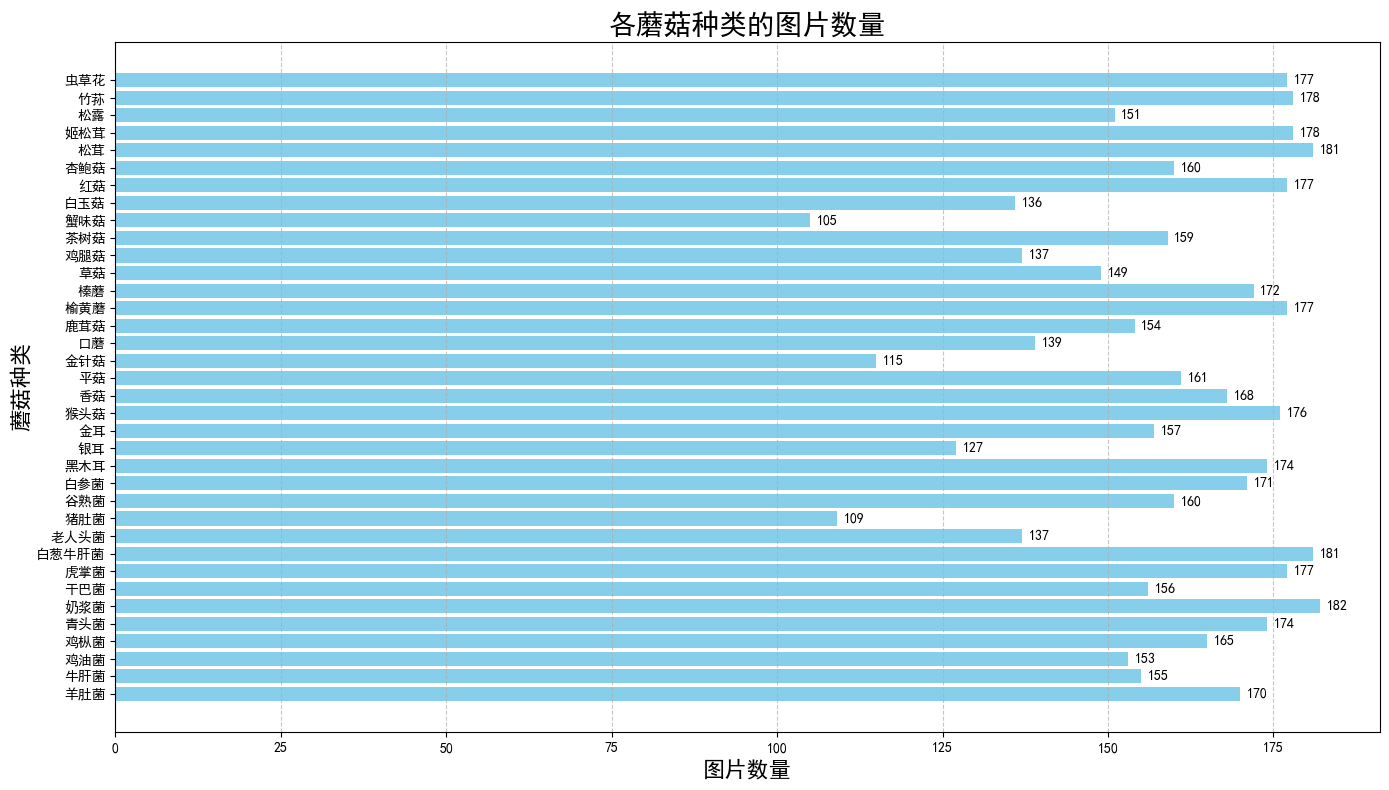

In [4]:
# 准备数据
categories_readable = list(category_counts.keys())
counts = list(category_counts.values())

# 创建一个新的图形
plt.figure(figsize=(14, 8))

# 绘制柱状图
bars = plt.barh(categories_readable, counts, color='skyblue')

# 添加数据标签
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, '%d' % int(width), va='center')

# 设置标题和标签
plt.title('各蘑菇种类的图片数量', fontsize=20)
plt.xlabel('图片数量', fontsize=16)
plt.ylabel('蘑菇种类', fontsize=16)

# 设置网格
plt.grid(axis='x', linestyle='--', alpha=0.7)
# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 训练准备工作

## 加载图像数据集

使用 TensorFlow 的 [image_dataset_from_directory](https://tensorflow.google.cn/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory?hl=en) 函数加载和准备图像数据集：


*   directory=dataset_path ：指定图像数据所在的路径。
*   image_size=(224, 224) ：指定每个图像的大小为224x224像素。
*   batch_size=32 ：指定每个批次包含32张图像。
*   validation_split=0.1 ：指定10%的数据作为验证集。
*   subset='both' ：指定同时返回训练集和验证集。
*   label_mode='categorical' ：指定标签模式为分类模式，返回one-hot编码的标签。
*   seed=21 ：设置随机种子以确保数据集的可重复性。



In [5]:
import tensorflow as tf

# 加载和准备图像数据集
train_dataset, validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_path,
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.1,
    subset='both',
    label_mode='categorical',
    seed=21
)

Found 5698 files belonging to 36 classes.
Using 5129 files for training.
Using 569 files for validation.


## 计算训练集和验证集的各种类图片分布

In [6]:
import numpy as np

# 获取类别名称
class_names = train_dataset.class_names

# 初始化字典用于存储每种类别的图像数量
train_category_counts = {name: 0 for name in categories.values()}
validation_category_counts = {name: 0 for name in categories.values()}

# 统计训练集中的图像数量
for images, labels in train_dataset:
    for label in labels.numpy():
        category_name = class_names[np.argmax(label)]
        train_category_counts[categories[category_name]] += 1

# 统计验证集中的图像数量
for images, labels in validation_dataset:
    for label in labels.numpy():
        category_name = class_names[np.argmax(label)]
        validation_category_counts[categories[category_name]] += 1


print("训练集类别图像数量统计:", train_category_counts)
print("验证集类别图像数量统计:", validation_category_counts)

训练集类别图像数量统计: {'羊肚菌': 149, '牛肝菌': 142, '鸡油菌': 135, '鸡枞菌': 143, '青头菌': 155, '奶浆菌': 167, '干巴菌': 130, '虎掌菌': 165, '白葱牛肝菌': 162, '老人头菌': 121, '猪肚菌': 100, '谷熟菌': 142, '白参菌': 161, '黑木耳': 157, '银耳': 108, '金耳': 143, '猴头菇': 160, '香菇': 151, '平菇': 140, '金针菇': 102, '口蘑': 126, '鹿茸菇': 136, '榆黄蘑': 166, '榛蘑': 155, '草菇': 136, '鸡腿菇': 128, '茶树菇': 143, '蟹味菇': 89, '白玉菇': 125, '红菇': 160, '杏鲍菇': 142, '松茸': 165, '姬松茸': 169, '松露': 134, '竹荪': 157, '虫草花': 165}
验证集类别图像数量统计: {'羊肚菌': 21, '牛肝菌': 13, '鸡油菌': 18, '鸡枞菌': 22, '青头菌': 19, '奶浆菌': 15, '干巴菌': 26, '虎掌菌': 12, '白葱牛肝菌': 19, '老人头菌': 16, '猪肚菌': 9, '谷熟菌': 18, '白参菌': 10, '黑木耳': 17, '银耳': 19, '金耳': 14, '猴头菇': 16, '香菇': 17, '平菇': 21, '金针菇': 13, '口蘑': 13, '鹿茸菇': 18, '榆黄蘑': 11, '榛蘑': 17, '草菇': 13, '鸡腿菇': 9, '茶树菇': 16, '蟹味菇': 16, '白玉菇': 11, '红菇': 17, '杏鲍菇': 18, '松茸': 16, '姬松茸': 9, '松露': 17, '竹荪': 21, '虫草花': 12}


## 绘制训练集和验证集的柱状图

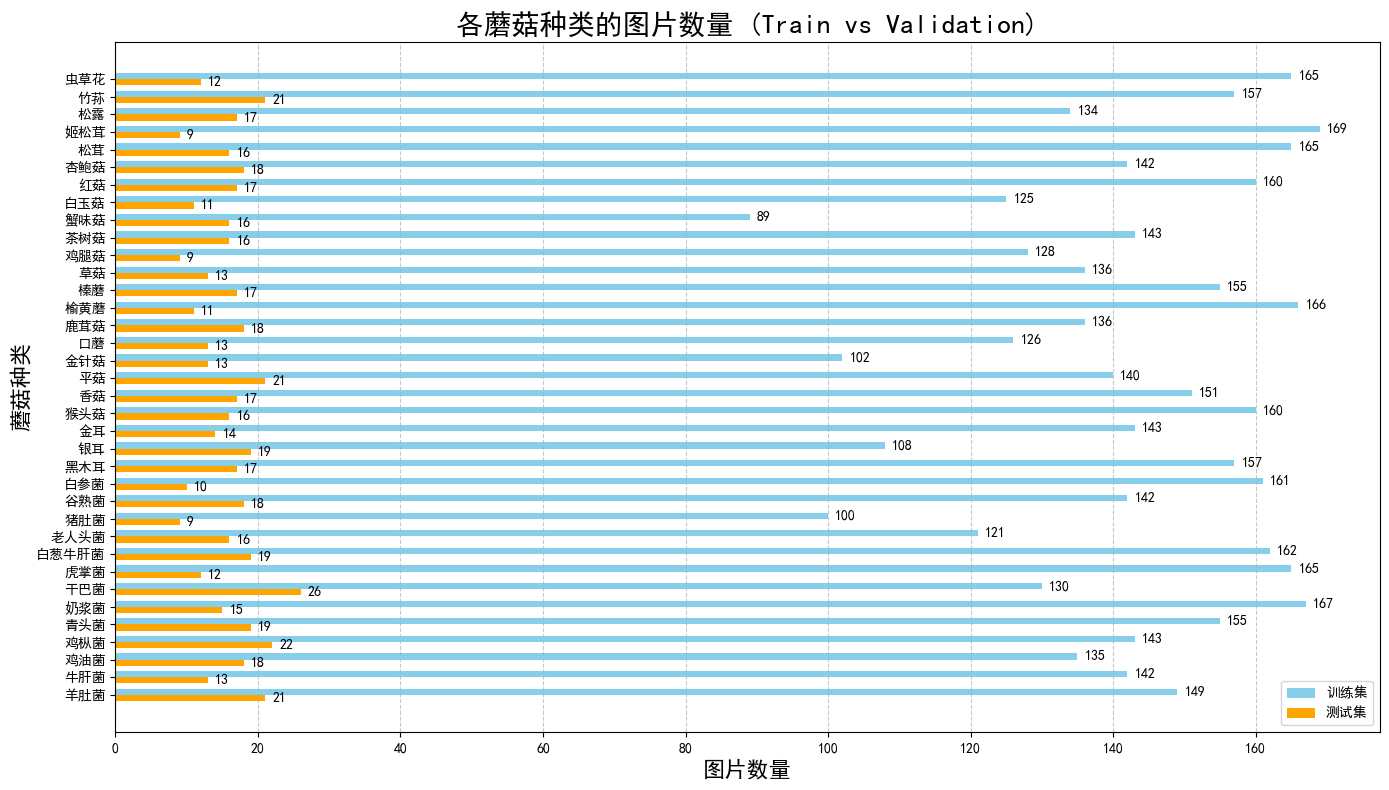

In [7]:
# 准备数据
categories_readable = list(categories.values())  # 使用中文名映射
train_counts = [train_category_counts[name] for name in categories_readable]
validation_counts = [validation_category_counts[name] for name in categories_readable]

# 创建一个新的图形
plt.figure(figsize=(14, 8))

# 设置柱子的位置
bar_width = 0.35
index = np.arange(len(categories_readable))

# 绘制训练集柱状图
bars_train = plt.barh(index + bar_width, train_counts, bar_width, label='训练集', color='skyblue')

# 绘制验证集柱状图
bars_validation = plt.barh(index, validation_counts, bar_width, label='测试集', color='orange')

# 添加数据标签
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height() / 2, '%d' % int(width), ha='left', va='center')

add_labels(bars_train)
add_labels(bars_validation)

# 设置标题和标签
plt.title('各蘑菇种类的图片数量 (Train vs Validation)', fontsize=20)
plt.xlabel('图片数量', fontsize=16)
plt.ylabel('蘑菇种类', fontsize=16)

# 设置Y轴刻度
plt.yticks(index + bar_width / 2, categories_readable)

# 显示网格
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 添加图例
plt.legend()

# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()

## 显示数据集中的图像样本

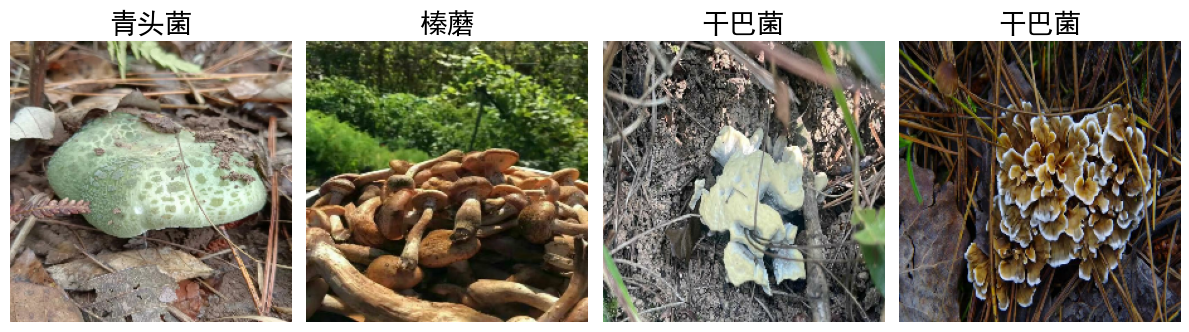

In [8]:
# 获取类别名称
class_names = train_dataset.class_names

# 设置要显示的图像数量
num_images_to_show = 4
images_to_display = []
labels_to_display = []

# 从数据集中获取随机选择的图像和标签
for images, labels in train_dataset.take(1):
    indices = np.random.choice(range(images.shape[0]), num_images_to_show, replace=False)
    for index in indices:
        images_to_display.append(images[index])
        labels_to_display.append(labels[index])

# 创建图形并显示图像
fig, axes = plt.subplots(1, num_images_to_show, figsize=(12, 4))
for i, (image, label) in enumerate(zip(images_to_display, labels_to_display)):
    ax = axes[i]
    ax.imshow(image.numpy().astype("uint8"))
    ax.set_title(categories[class_names[np.argmax(label.numpy())]], fontsize=20)
    ax.axis("off")

plt.tight_layout()
plt.show()

# 数据增强

数据增强是一种常用的技术，用于通过变换现有数据来增加训练数据的多样性，从而提高模型的泛化能力。在图像处理中，常见的数据增强技术包括旋转、翻转、缩放、裁剪、亮度调整等。

## 定义数据增强层

In [9]:
# 定义数据增强的预处理层
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # 水平翻转
    tf.keras.layers.RandomRotation(0.2),       # 随机旋转最多20%
    tf.keras.layers.RandomZoom(0.2, 0.2),      # 随机缩放
    tf.keras.layers.RandomContrast(0.2),       # 随机对比度调整
    tf.keras.layers.RandomBrightness(0.2)      # 随机亮度调整
])

## 定义显示数据增强示例函数

In [10]:
def demo_augmentation(sample_image, model, num_aug):
    '''Takes a single image array, then uses a model to generate num_aug transformations'''

    # Instantiate preview list
    image_preview = []

    # Convert input image to a PIL image instance
    sample_image_pil = tf.keras.utils.array_to_img(sample_image)

    # Append the result to the list
    image_preview.append(sample_image_pil)

    # Apply the image augmentation and append the results to the list
    for i in range(NUM_AUG):
        sample_image_aug = model(tf.expand_dims(sample_image, axis=0))
        sample_image_aug_pil = tf.keras.utils.array_to_img(tf.squeeze(sample_image_aug))
        image_preview.append(sample_image_aug_pil)

    # Instantiate a subplot
    fig, axes = plt.subplots(1, NUM_AUG + 1, figsize=(12, 12))

    # Preview the images.
    for index, ax in enumerate(axes):
        ax.imshow(image_preview[index])
        ax.set_axis_off()

        if index == 0:
            ax.set_title('original')
        else:
            ax.set_title(f'augment {index}')

## 获取随机批次

In [11]:
# 获取训练集中随机的一批次图片
sample_batch = list(train_dataset.take(1))[0][0]
print(f'images per batch: {len(sample_batch)}')

images per batch: 32


## 显示数据增强示例

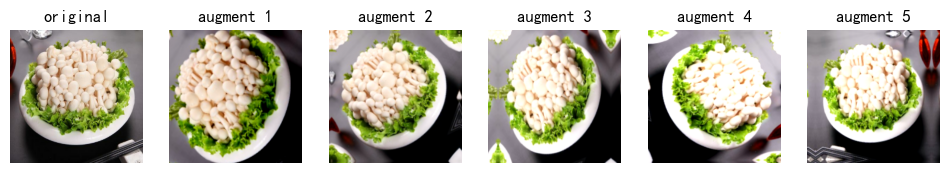

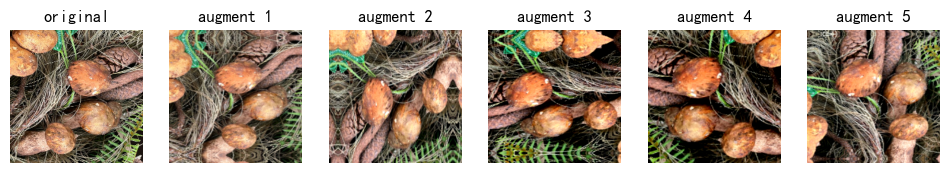

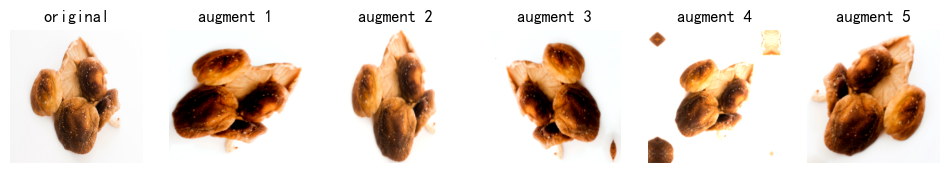

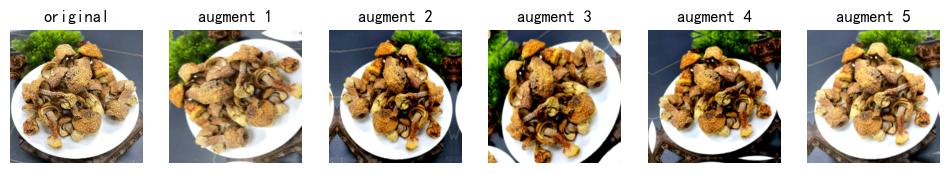

In [12]:
NUM_AUG = 5

# Apply the transformations to the first 4 images
demo_augmentation(sample_batch[0], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[1], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[2], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[3], data_augmentation, NUM_AUG)

# MobileNetV1模型

In [ ]:
# 初始化基础模型
pre_trained_model = tf.keras.applications.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# 冻结基础模型的权重
for layer in pre_trained_model.layers:
    layer.trainable = False

# 应用数据增强和预处理
x = data_augmentation(pre_trained_model.input)
x = tf.keras.applications.mobilenet.preprocess_input(x)

# 添加自定义顶层分类器
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
#x = Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

# 构建最终模型
MobileNet = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=predictions)

# 编译模型
MobileNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 查看模型结构
MobileNet.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,500,516 (13.35 MB)

 Trainable params: 271,652 (1.04 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
# Train the model
MobileNet_history = MobileNet.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset)


Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.0909 - loss: 3.5757 - val_accuracy: 0.2619 - val_loss: 2.7478
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.3470 - loss: 2.5139 - val_accuracy: 0.4622 - val_loss: 2.0748
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.4844 - loss: 1.9344 - val_accuracy: 0.5325 - val_loss: 1.7464
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.5606 - loss: 1.6318 - val_accuracy: 0.5606 - val_loss: 1.5876
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.5991 - loss: 1.4639 - val_accuracy: 0.5905 - val_loss: 1.4718
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.6263 - loss: 1.3597 - val_accuracy: 0.6151 - val_loss: 1.3841
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.6571 - loss: 1.2608 - val_accuracy: 0.6204 - val_loss: 1.3341
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6813 - loss: 1.1864 -

In [16]:
def show_history(history):
  # 绘制训练过程中的损失和准确率曲线
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Loss Over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy Over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

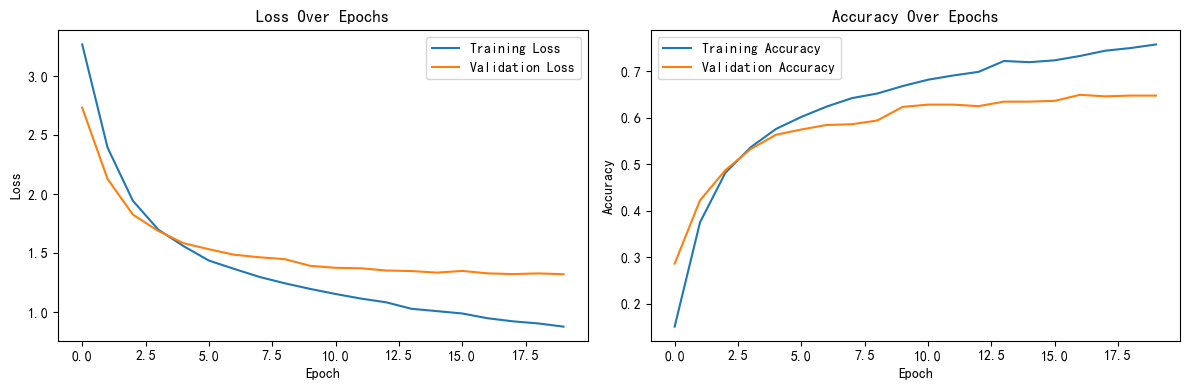

In [ ]:
show_history(MobileNet_history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/s

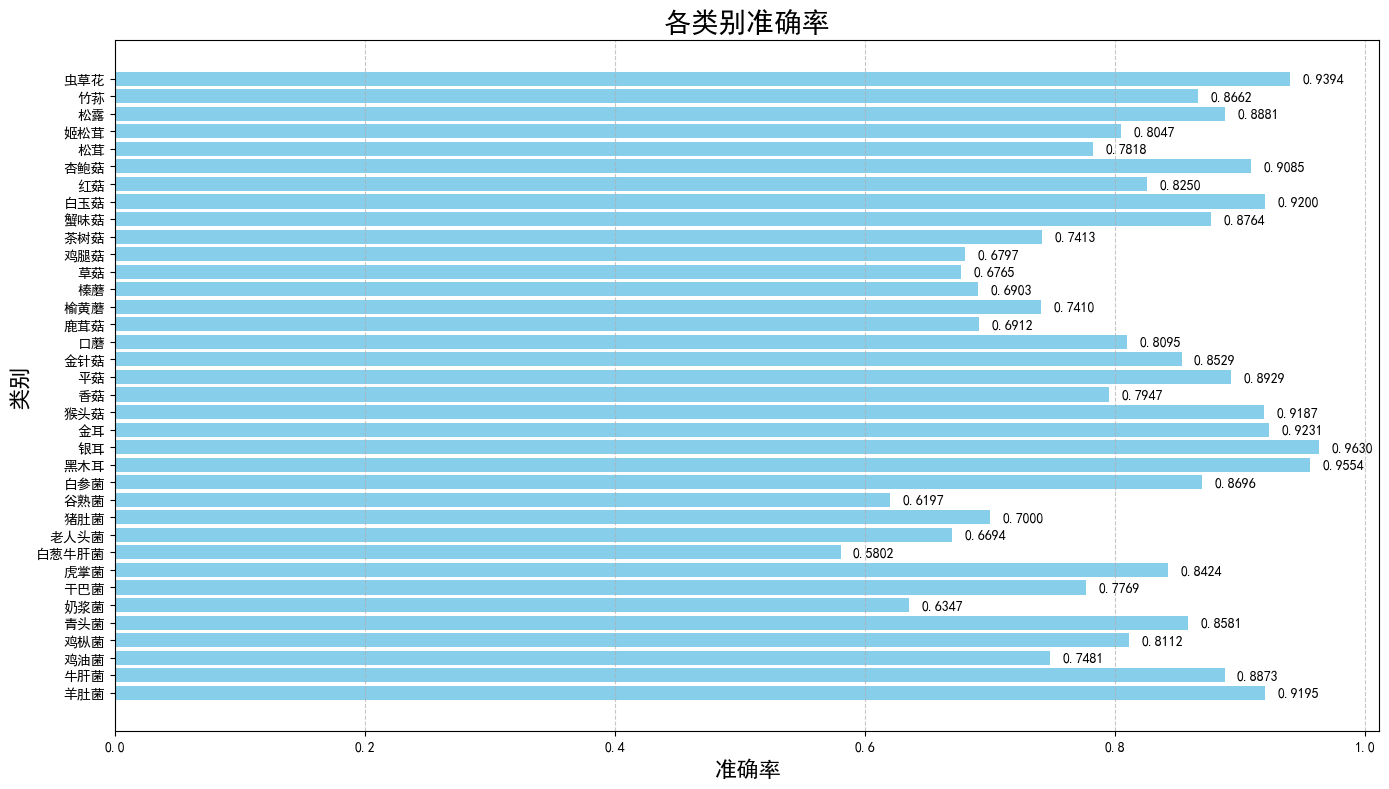

{'class00': 0.9194630872483222,
 'class01': 0.8873239436619719,
 'class02': 0.7481481481481481,
 'class03': 0.8111888111888111,
 'class04': 0.8580645161290322,
 'class05': 0.6347305389221557,
 'class06': 0.7769230769230769,
 'class07': 0.8424242424242424,
 'class08': 0.5802469135802469,
 'class09': 0.6694214876033058,
 'class10': 0.7,
 'class11': 0.6197183098591549,
 'class12': 0.8695652173913043,
 'class13': 0.9554140127388535,
 'class14': 0.9629629629629629,
 'class15': 0.9230769230769231,
 'class16': 0.91875,
 'class17': 0.7947019867549668,
 'class18': 0.8928571428571429,
 'class19': 0.8529411764705882,
 'class20': 0.8095238095238095,
 'class21': 0.6911764705882353,
 'class22': 0.7409638554216867,
 'class23': 0.6903225806451613,
 'class24': 0.6764705882352942,
 'class25': 0.6796875,
 'class26': 0.7412587412587412,
 'class27': 0.8764044943820225,
 'class28': 0.92,
 'class29': 0.825,
 'class30': 0.9084507042253521,
 'class31': 0.7818181818181819,
 'class32': 0.8047337278106509,
 'clas

In [ ]:
# 在训练完成后计算每个类别的准确率
def calculate_class_accuracies(model, dataset):
    all_predictions = []
    all_true_labels = []

    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(labels, axis=1)

        all_predictions.extend(predicted_classes)
        all_true_labels.extend(true_classes)

    class_accuracies = {}
    for class_index in range(len(class_names)):
        mask = (np.array(all_true_labels) == class_index)
        correct_predictions = np.sum(np.array(all_predictions)[mask] == class_index)
        total_samples = np.sum(mask)
        if total_samples > 0:
            accuracy = correct_predictions / total_samples
        else:
            accuracy = 0
        class_accuracies[class_names[class_index]] = accuracy

    print("Class Accuracies:")
    for class_name, accuracy in class_accuracies.items():
        print(f"  {categories[class_name]}: {accuracy:.4f}")

    # 准备数据
    categories_readable = list(categories[class_name] for class_name in class_accuracies.keys())
    accuracies = list(class_accuracies.values())

    # 创建一个新的图形
    plt.figure(figsize=(14, 8))

    # 绘制柱状图
    bars = plt.barh(categories_readable, accuracies, color='skyblue')

    # 添加数据标签
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center')

    # 设置标题和标签
    plt.title('各类别准确率', fontsize=20)
    plt.xlabel('准确率', fontsize=16)
    plt.ylabel('类别', fontsize=16)

    # 设置网格
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    # 自动调整布局
    plt.tight_layout()

    # 显示图形
    plt.show()

    return class_accuracies

In [ ]:
# 计算并打印每个类别的准确率
calculate_class_accuracies(MobileNet, train_dataset)

# MobileNetV2模型

In [ ]:
# 初始化基础模型
pre_trained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# 冻结基础模型的权重
for layer in pre_trained_model.layers:
    layer.trainable = False

# 应用数据增强和预处理
x = data_augmentation(pre_trained_model.input)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

# 添加自定义顶层分类器
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
#x = Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

# 构建最终模型
MobileNetV2 = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=predictions)

# 编译模型
MobileNetV2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 查看模型结构
MobileNetV2.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_1 (TrueDivide)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_1 (Subtract)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,595,172 (9.90 MB)

 Trainable params: 337,188 (1.29 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the model
MobileNetV2_history = MobileNetV2.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset)


Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.1077 - loss: 3.4854 - val_accuracy: 0.3252 - val_loss: 2.6859
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.4112 - loss: 2.3924 - val_accuracy: 0.4579 - val_loss: 2.0621
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.5312 - loss: 1.8318 - val_accuracy: 0.5065 - val_loss: 1.7924
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.5856 - loss: 1.5793 - val_accuracy: 0.5469 - val_loss: 1.6378
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.6218 - loss: 1.4183 - val_accuracy: 0.5647 - val_loss: 1.5584
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6489 - loss: 1.3230 - val_accuracy: 0.5874 - val_loss: 1.5074
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.6601 - loss: 1.2664 - val_accuracy: 0.6019 - val_loss: 1.4722
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.6918 - loss: 1.1819 

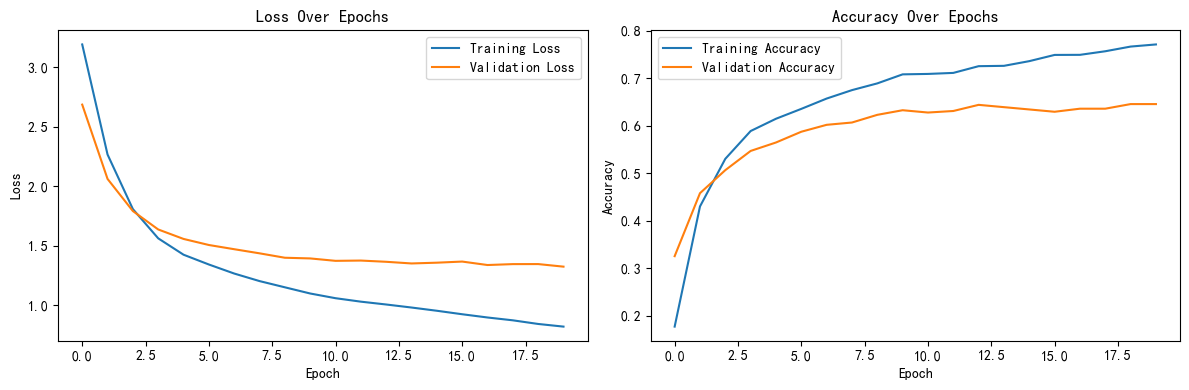

In [ ]:
show_history(MobileNetV2_history)

# MobileNetV3Small

In [ ]:
# 初始化基础模型
pre_trained_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# 冻结基础模型的权重
for layer in pre_trained_model.layers:
    layer.trainable = False

# 应用数据增强和预处理
x = data_augmentation(pre_trained_model.input)
x = tf.keras.applications.mobilenet_v3.preprocess_input(x)

# 添加自定义顶层分类器
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
#x = Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

# 构建最终模型
MobileNetV3Small = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=predictions)

# 编译模型
MobileNetV3Small.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 查看模型结构
MobileNetV3Small.summary()

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,096,084 (4.18 MB)

 Trainable params: 156,964 (613.14 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [ ]:
# Train the model
MobileNetV3Small_history = MobileNetV3Small.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset)


Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.0608 - loss: 3.6566 - val_accuracy: 0.2314 - val_loss: 2.9711
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.2821 - loss: 2.8710 - val_accuracy: 0.3932 - val_loss: 2.3810
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.4195 - loss: 2.3312 - val_accuracy: 0.4757 - val_loss: 2.0250
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.4818 - loss: 2.0040 - val_accuracy: 0.5146 - val_loss: 1.8236
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.5212 - loss: 1.8242 - val_accuracy: 0.5421 - val_loss: 1.6893
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.5526 - loss: 1.6728 - val_accuracy: 0.5502 - val_loss: 1.5970
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.5801 - loss: 1.5833 - val_accuracy: 0.5583 - val_loss: 1.5400
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.5897 - loss: 1.5027 -

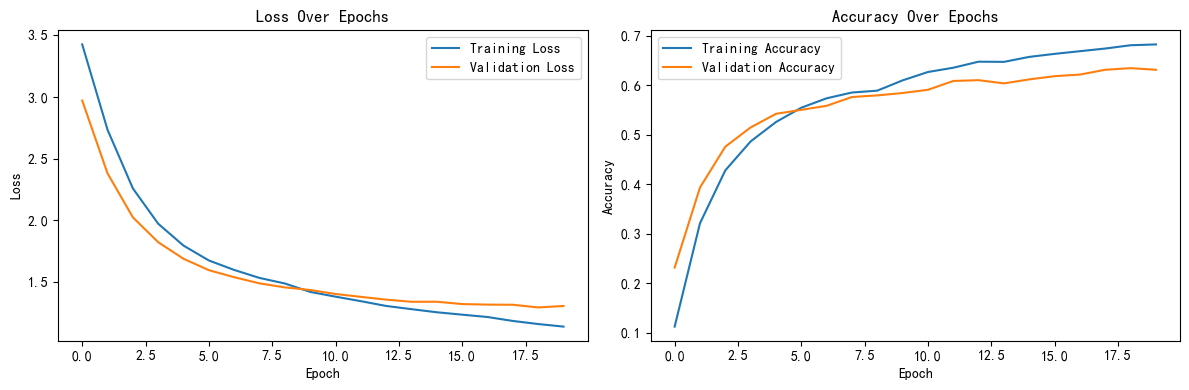

In [ ]:
show_history(MobileNetV3Small_history)

# EfficientNet模型

In [ ]:
# 初始化基础模型
pre_trained_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# 冻结基础模型的权重
for layer in pre_trained_model.layers:
    layer.trainable = False

# 应用数据增强和预处理
x = data_augmentation(pre_trained_model.input)
x = tf.keras.applications.efficientnet.preprocess_input(x)

# 添加自定义顶层分类器
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
#x = Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

# 构建最终模型
EfficientNetB0 = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=predictions)

# 编译模型
EfficientNetB0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 查看模型结构
EfficientNetB0.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,386,759 (16.73 MB)

 Trainable params: 337,188 (1.29 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# Train the model
EfficientNetB0_history = EfficientNetB0.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset)


Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 32s 117ms/step - accuracy: 0.1154 - loss: 3.4467 - val_accuracy: 0.4045 - val_loss: 2.7477
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.4366 - loss: 2.5551 - val_accuracy: 0.5275 - val_loss: 2.0365
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.5441 - loss: 1.9500 - val_accuracy: 0.5777 - val_loss: 1.7033
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - accuracy: 0.6081 - loss: 1.6285 - val_accuracy: 0.6117 - val_loss: 1.5314
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.6500 - loss: 1.4402 - val_accuracy: 0.6278 - val_loss: 1.4266
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.6552 - loss: 1.3314 - val_accuracy: 0.6472 - val_loss: 1.3536
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.6827 - loss: 1.2513 - val_accuracy: 0.6570 - val_loss: 1.3018
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 24s 116ms/step - accuracy: 0.6994 - loss: 1.1876

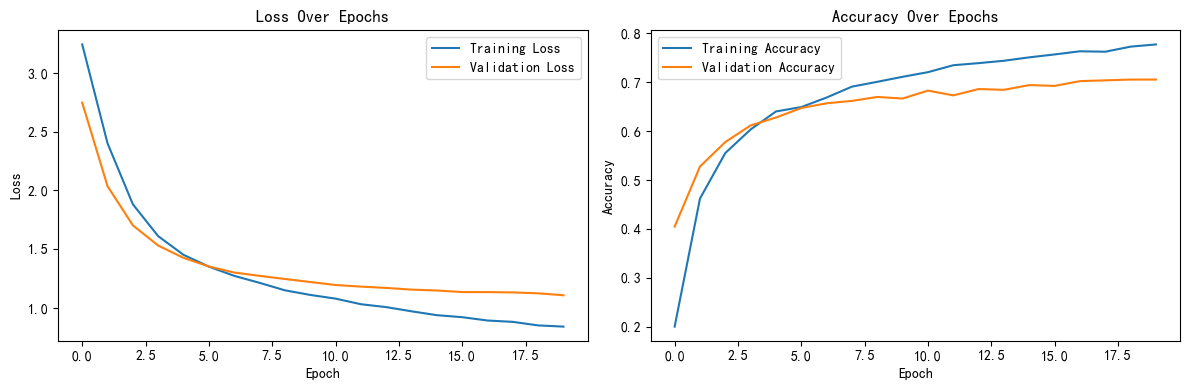

In [ ]:
show_history(EfficientNetB0_history)

# EfficientNetV2S模型

In [ ]:
# 初始化基础模型
pre_trained_model = tf.keras.applications.EfficientNetV2S(
    input_shape=(224, 224, 3),
    include_top=False,
    include_preprocessing=False,
    weights='imagenet'
)

# 冻结基础模型的权重
for layer in pre_trained_model.layers:
    layer.trainable = False

# 应用数据增强和预处理
x = data_augmentation(pre_trained_model.input)
x = tf.keras.applications.efficientnet_v2.preprocess_input(x)

# 添加自定义顶层分类器
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
#x = Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

# 构建最终模型
EfficientNetV2S = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=predictions)

# 编译模型
EfficientNetV2S.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 查看模型结构
EfficientNetV2S.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-s (Functional)        │ (None, 7, 7, 1280)          │      20,331,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,668,548 (78.84 MB)

 Trainable params: 337,188 (1.29 MB)

 Non-trainable params: 20,331,360 (77.56 MB)

In [ ]:
# Train the model
EfficientNetV2S_history = EfficientNetV2S.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset)


Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 65s 233ms/step - accuracy: 0.0338 - loss: 69.5405 - val_accuracy: 0.0275 - val_loss: 33.1460
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 193ms/step - accuracy: 0.0322 - loss: 37.8745 - val_accuracy: 0.0437 - val_loss: 17.3223
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 180ms/step - accuracy: 0.0256 - loss: 18.6716 - val_accuracy: 0.0275 - val_loss: 7.3136
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 194ms/step - accuracy: 0.0271 - loss: 9.8338 - val_accuracy: 0.0210 - val_loss: 4.6870
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 193ms/step - accuracy: 0.0269 - loss: 6.4450 - val_accuracy: 0.0275 - val_loss: 4.0329
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 32s 181ms/step - accuracy: 0.0355 - loss: 5.1681 - val_accuracy: 0.0291 - val_loss: 3.8426
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 32s 181ms/step - accuracy: 0.0312 - loss: 4.6787 - val_accuracy: 0.0259 - val_loss: 3.7287
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.0319 - lo

KeyboardInterrupt: 

In [ ]:
show_history(EfficientNetV2S_history)

# ResNet模型

In [13]:
# 初始化基础模型
pre_trained_model = tf.keras.applications.ResNet101(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# 冻结基础模型的权重
for layer in pre_trained_model.layers:
    layer.trainable = False

# 应用数据增强和预处理
x = data_augmentation(pre_trained_model.input)
x = tf.keras.applications.resnet.preprocess_input(x)

# 添加自定义顶层分类器
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
#x = Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

# 构建最终模型
ResNet101 = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=predictions)

# 编译模型
ResNet101.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 查看模型结构
ResNet101.summary()

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 224, 224)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 224, 224)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 224, 224)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 224, 224, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 224, 224, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet101 (Functional)    │ (None, 7, 7, 2048)     │     42,658,176 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 2048)           │              0 │ resnet101[0][0]        │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        524,544 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 36)             │          9,252 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 43,191,972 (164.76 MB)

 Trainable params: 533,796 (2.04 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

In [14]:
# Train the model
ResNet101_history = ResNet101.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset)


Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 65s 279ms/step - accuracy: 0.1548 - loss: 3.3011 - val_accuracy: 0.4710 - val_loss: 2.0247
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 73s 242ms/step - accuracy: 0.4956 - loss: 1.8924 - val_accuracy: 0.5923 - val_loss: 1.4434
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 248ms/step - accuracy: 0.6262 - loss: 1.4100 - val_accuracy: 0.6397 - val_loss: 1.2460
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 246ms/step - accuracy: 0.6735 - loss: 1.2100 - val_accuracy: 0.6591 - val_loss: 1.1850
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 238ms/step - accuracy: 0.7136 - loss: 1.0666 - val_accuracy: 0.6749 - val_loss: 1.1136
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 237ms/step - accuracy: 0.7307 - loss: 0.9761 - val_accuracy: 0.6801 - val_loss: 1.0747
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 237ms/step - accuracy: 0.7464 - loss: 0.9164 - val_accuracy: 0.7047 - val_loss: 1.0623
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 247ms/step - accuracy: 0.7681 - loss: 0

In [15]:
show_history(ResNet101_history)

NameError: name 'show_history' is not defined

In [ ]:
calculate_class_accuracies(ResNet101)